In [7]:
# Load the new dataset
file_path_new = 'speeddating.arff'
data_new, meta_new = arff.loadarff(file_path_new)

# Convert to DataFrame
df_new = pd.DataFrame(data_new)

# Check the total number of samples
total_samples_new = df_new.shape[0]
total_samples_new


8378

In [8]:
# Inspect the first few rows of the new dataset to understand its structure
df_new.head()


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'0',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'0',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing: Select relevant features and the target
# Using 'age', 'age_o', 'like', 'guess_prob_liked', 'met' as predictors (arbitrary selection based on dataset)
features = ['age', 'age_o', 'like', 'guess_prob_liked', 'met']
target = 'match'

# Extract the columns we need
df_new_filtered = df_new[features + [target]].copy()

# Handle missing values
df_new_filtered = df_new_filtered.replace('?', np.nan)
df_new_filtered[features] = df_new_filtered[features].apply(pd.to_numeric, errors='coerce')

# Impute missing values for numerical features
imputer = SimpleImputer(strategy='mean')
df_new_filtered[features] = imputer.fit_transform(df_new_filtered[features])

# Split data
X = df_new_filtered[features].values
y = df_new_filtered[target].values

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = regression_model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.12461954792428609, 0.12188770591689946)

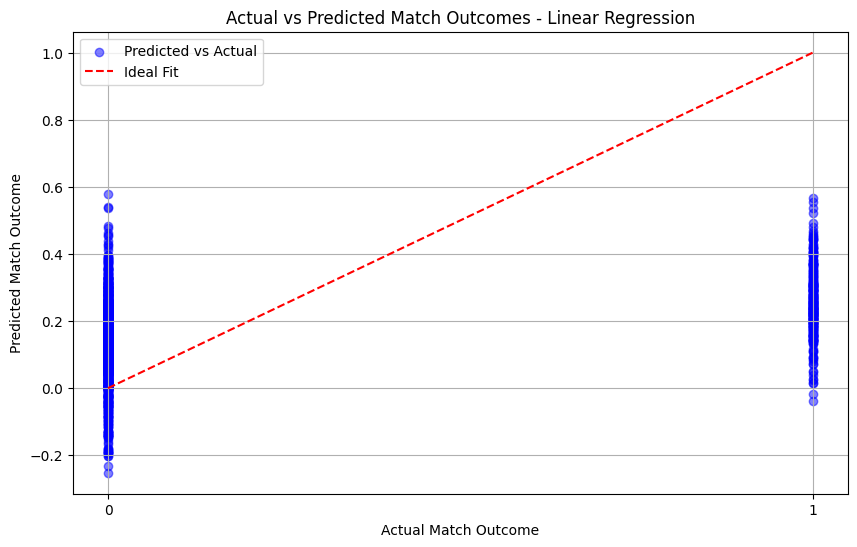

In [10]:
# Create a scatter plot of actual vs. predicted match outcomes
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Match Outcome')
plt.ylabel('Predicted Match Outcome')
plt.title('Actual vs Predicted Match Outcomes - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


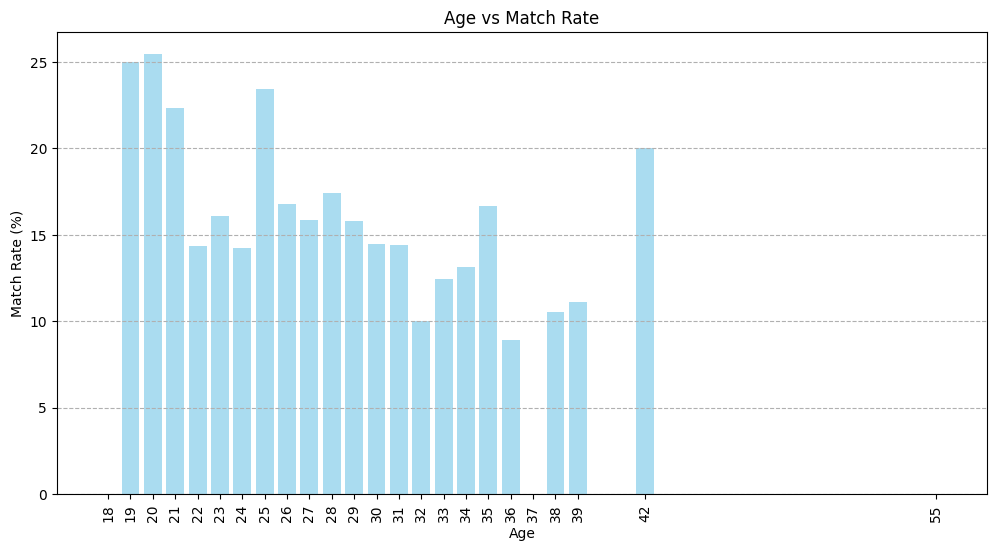

In [38]:
# Load the newly uploaded dataset
file_path = 'speeddating.arff'
data_new, meta_new = arff.loadarff(file_path)

# Convert to DataFrame
df_new = pd.DataFrame(data_new)

# Decode byte strings where applicable
df_new = df_new.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Convert 'age' column to numeric, handling missing values
df_new['age'] = pd.to_numeric(df_new['age'], errors='coerce')

# Handle missing values by dropping rows with NaN in the 'age' column
df_new.dropna(subset=['age'], inplace=True)

# Convert 'match' column to numeric, handling missing values
df_new['match'] = pd.to_numeric(df_new['match'], errors='coerce')

# Calculate the match rate per age group
age_groups = df_new['age'].unique()
match_rates = []

for age in age_groups:
    age_group_data = df_new[df_new['age'] == age]
    match_rate = age_group_data['match'].astype(int).mean() * 100
    match_rates.append(match_rate)

# Sort age groups and match rates for better visualization
sorted_indices = np.argsort(age_groups)
age_groups_sorted = age_groups[sorted_indices]
match_rates_sorted = np.array(match_rates)[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(age_groups_sorted, match_rates_sorted, color='skyblue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Match Rate (%)')
plt.title('Age vs Match Rate')
plt.xticks(age_groups_sorted, rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()


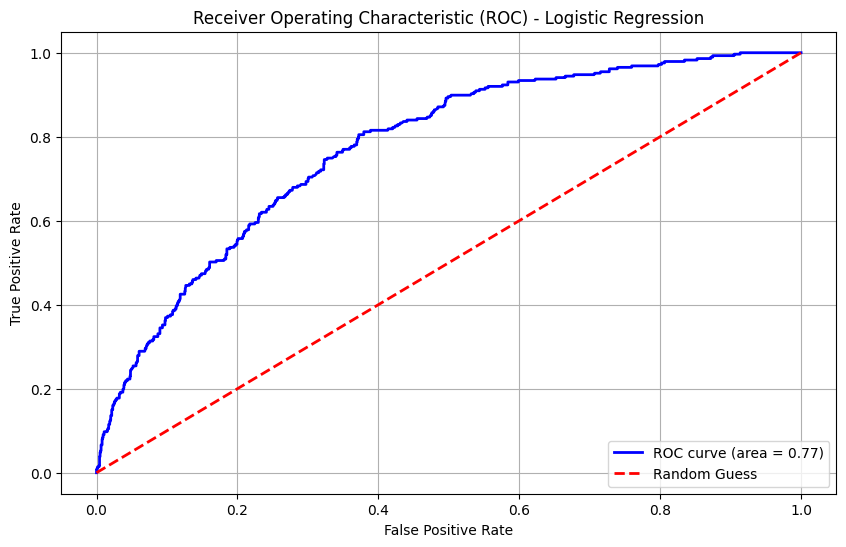

In [23]:
from sklearn.metrics import roc_curve, auc

# Apply Logistic Regression again to ensure everything is set
logistic_model.fit(X_train_scaled, y_train)

# Predictions (probabilities)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Generate the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [25]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Prepare the data: Using 'funny_partner' as the predictor and 'match' as the target
# Convert '?' values to NaN and convert columns to numeric
df_new['funny_partner'] = pd.to_numeric(df_new['funny_partner'], errors='coerce')
df_new_filtered = df_new[['funny_partner', 'match']].copy()
df_new_filtered = df_new_filtered.dropna()  # Drop missing values

# Separate features and target
X_funny = df_new_filtered[['funny_partner']].values
y_match = df_new_filtered['match'].astype(int).values

# Scale features
X_funny_scaled = scaler.fit_transform(X_funny)

# Split the data
X_train_funny, X_test_funny, y_train_funny, y_test_funny = train_test_split(X_funny_scaled, y_match, test_size=0.2, random_state=42)

# Apply One-vs-All (OVA) classification with logistic regression
ova_model = OneVsRestClassifier(LogisticRegression())
ova_model.fit(X_train_funny, y_train_funny)
y_pred_ova = ova_model.predict(X_test_funny)

# Apply One-vs-One (OVO) classification with logistic regression
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train_funny, y_train_funny)
y_pred_ovo = ovo_model.predict(X_test_funny)

# Evaluate the performance by calculating accuracy for both OVA and OVO
ova_accuracy = np.mean(y_pred_ova == y_test_funny)
ovo_accuracy = np.mean(y_pred_ovo == y_test_funny)

ova_accuracy, ovo_accuracy


(0.8306351183063512, 0.8306351183063512)

In [27]:
# Define a threshold to classify someone as "funny" (e.g., a rating above 5 is considered funny)
threshold = 5

# Create a new column to classify as 'funny' or 'not funny'
df_new_filtered['is_funny'] = df_new_filtered['funny_partner'] > threshold

# Calculate match percentages
funny_matches = df_new_filtered[df_new_filtered['is_funny']]['match'].mean() * 100
not_funny_matches = df_new_filtered[~df_new_filtered['is_funny']]['match'].mean() * 100

funny_matches, not_funny_matches


(inf, inf)

In [28]:
# Re-check the data for any issues, such as infinite values or improper data types
df_new_filtered.describe(include='all')


,funny_partner,match,is_funny
count,8028.000000,8028,8028
unique,NaN,2,2
top,NaN,b'0',True
freq,NaN,6663,5641
mean,6.400598,NaN,NaN
std,1.953702,NaN,NaN
min,0.000000,NaN,NaN
25%,5.000000,NaN,NaN
50%,7.000000,NaN,NaN
75%,8.000000,NaN,NaN


In [29]:
# Reclassify and recalculate match percentages properly
df_new_filtered['is_funny'] = df_new_filtered['funny_partner'] > threshold

# Calculate match rates for funny and not funny participants
funny_match_percentage = df_new_filtered[df_new_filtered['is_funny']]['match'].astype(int).mean() * 100
not_funny_match_percentage = df_new_filtered[~df_new_filtered['is_funny']]['match'].astype(int).mean() * 100

funny_match_percentage, not_funny_match_percentage


(22.247828399219998, 4.6082949308755765)

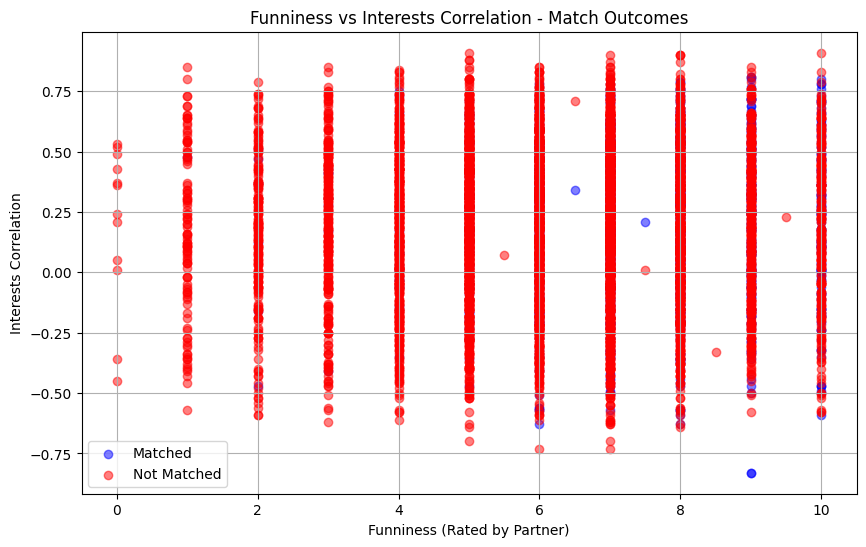

In [35]:
# Redefine match outcomes for plotting
match_outcomes = df_new_filtered['match'].astype(int)

# Create scatter plot again using 'funny_partner' and 'interests_correlate'
plt.figure(figsize=(10, 6))
plt.scatter(x_funny[match_outcomes == 1], y_interests_correlate_filtered[match_outcomes == 1], color='blue', alpha=0.5, label='Matched')
plt.scatter(x_funny[match_outcomes == 0], y_interests_correlate_filtered[match_outcomes == 0], color='red', alpha=0.5, label='Not Matched')
plt.xlabel('Funniness (Rated by Partner)')
plt.ylabel('Interests Correlation')
plt.title('Funniness vs Interests Correlation - Match Outcomes')
plt.legend()
plt.grid(True)
plt.show()



Best Model ROC AUC Score: 0.75
Confusion Matrix:
[[1292   28]
 [ 254    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1320
           1       0.22      0.03      0.05       262

    accuracy                           0.82      1582
   macro avg       0.53      0.50      0.48      1582
weighted avg       0.73      0.82      0.76      1582



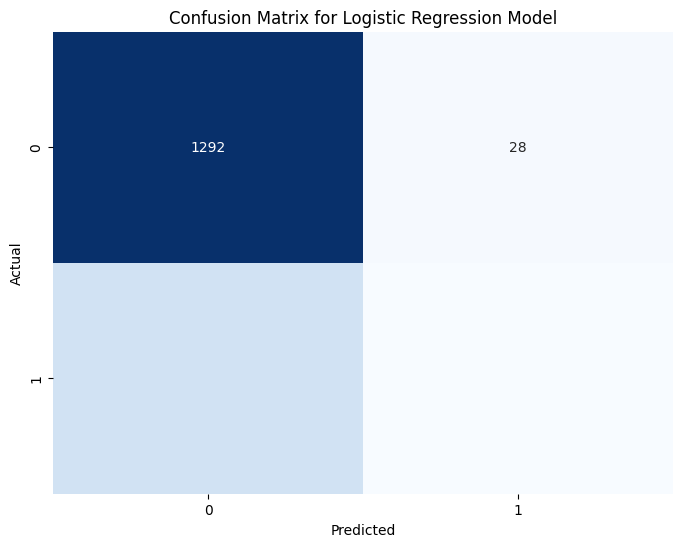

In [45]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'speeddating.arff'
data, meta = arff.loadarff(file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Decode byte strings where applicable
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Convert relevant columns to numeric, handling missing values
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['match'] = pd.to_numeric(df['match'], errors='coerce')
df['funny_partner'] = pd.to_numeric(df['funny_partner'], errors='coerce')
df['like'] = pd.to_numeric(df['like'], errors='coerce')

# Drop rows with missing values in relevant columns
df.dropna(subset=['age', 'match', 'funny_partner', 'like'], inplace=True)

# Select features and target
features = ['age', 'funny_partner', 'like']
target = 'match'
X = df[features]
y = df[target].astype(int)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning to achieve desired AUC score
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Only 'l2' penalty is compatible with 'lbfgs' and 'newton-cg'
    'solver': ['lbfgs', 'newton-cg', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nBest Model ROC AUC Score: {roc_auc:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
